In [471]:
import numpy as np
import pandas as pd
#from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeClassifier
#from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# READING THE DATA

In [472]:
data = pd.read_csv("processed.cleveland.csv")

Displying the data

In [473]:
#Returns the first 5 rows of the dataframe
data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [474]:
data

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


# DATA PREPROCESSING

Replacing "?" with nan

In [475]:
data.replace('?', np.nan , inplace = True)

Displaying the unique values

In [476]:
data.AGE.unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

In [477]:
data.THAL.unique()

array(['6', '3', '7', nan], dtype=object)

In [478]:
data.CA.unique()

array(['0', '3', '2', '1', nan], dtype=object)

Counting the missing values by coung the number of values available in columns

In [479]:
data.apply(lambda x: x.count(), axis=1)

0      14
1      14
2      14
3      14
4      14
       ..
298    14
299    14
300    14
301    14
302    13
Length: 303, dtype: int64

Finding the place which is missing (TRUE)

In [480]:
data.isnull()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [481]:
data

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Counting the number of missing values in each columns

In [482]:
data.isnull().sum()

AGE         0
SEX         0
CP          0
TRESTBPS    0
CHOL        0
FBS         0
RESTECG     0
THALACH     0
EXANG       0
OLDPEAK     0
SLOPE       0
CA          4
THAL        2
NUM         0
dtype: int64

In [483]:
#Total number of missing values
data.isnull().sum().sum()

6

Counting the total according to 0,1,2,3
Total:299
Missing:4
Adding both : 303 (Number of rows in dataset)

In [484]:
count = data['CA'].value_counts() 
print(count)

0    176
1     65
2     38
3     20
Name: CA, dtype: int64


In [485]:
# Replacing the missing values in CA with mode i.e 0
data['CA'] = data.CA.replace(np.nan, 0)

In [486]:
#Displaying column CA values
data['CA']

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    0
Name: CA, Length: 303, dtype: object

In [487]:
count = data['THAL'].value_counts() 
print(count) 

3    166
7    117
6     18
Name: THAL, dtype: int64


In [488]:
# Replacing the missing values in CA with mode i.e 3
data['THAL'] = data.THAL.replace(np.nan, 3)

In [489]:
#Displaying column THAL values
data['THAL']

0      6
1      3
2      7
3      3
4      3
      ..
298    7
299    7
300    7
301    3
302    3
Name: THAL, Length: 303, dtype: object

In [490]:
#Returns the dimensions of the array
data.shape

(303, 14)

In [491]:
#Printing the last five rows if the dataset
data[-5:]

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


In [492]:
#Describe(): It is used to view some basic statistical details
data.describe()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,NUM
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [493]:
# Checking to see if there are any duplicated data in dataset
data[data.duplicated() == True]

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM


In [494]:
# Removing duplicate data
data.drop_duplicates(inplace=True)

n_rows, n_cols = data.shape
print(f"After removing duplicate data we now have {n_rows} domain instances.")

After removing duplicate data we now have 303 domain instances.


In [495]:
data

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Converting the given interger values to 0 and 1
Heart disease (0 = no, 1 = yes)

In [496]:
data["NUM"].unique()
data.loc[data.NUM>0,["NUM"]] = 1

In [497]:
data.dtypes

AGE           int64
SEX           int64
CP            int64
TRESTBPS      int64
CHOL          int64
FBS           int64
RESTECG       int64
THALACH       int64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA           object
THAL         object
NUM           int64
dtype: object

In [498]:
data.info()
#print("=="*0)
len(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
AGE         303 non-null int64
SEX         303 non-null int64
CP          303 non-null int64
TRESTBPS    303 non-null int64
CHOL        303 non-null int64
FBS         303 non-null int64
RESTECG     303 non-null int64
THALACH     303 non-null int64
EXANG       303 non-null int64
OLDPEAK     303 non-null float64
SLOPE       303 non-null int64
CA          303 non-null object
THAL        303 non-null object
NUM         303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 35.5+ KB


303

# DATA VISUALIZATION

In [499]:
data.dtypes

AGE           int64
SEX           int64
CP            int64
TRESTBPS      int64
CHOL          int64
FBS           int64
RESTECG       int64
THALACH       int64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA           object
THAL         object
NUM           int64
dtype: object

In [500]:
data.dtypes

AGE           int64
SEX           int64
CP            int64
TRESTBPS      int64
CHOL          int64
FBS           int64
RESTECG       int64
THALACH       int64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA           object
THAL         object
NUM           int64
dtype: object

In [501]:
data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [502]:
data.isnull().sum()

AGE         0
SEX         0
CP          0
TRESTBPS    0
CHOL        0
FBS         0
RESTECG     0
THALACH     0
EXANG       0
OLDPEAK     0
SLOPE       0
CA          0
THAL        0
NUM         0
dtype: int64

Below the corelation plot we see that cp(chest pain),thalch and slope are highly corelated with the NUM.

In [503]:
plt.figure(figsize=(10,10))
corr=data.corr()
corr

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,NUM
AGE,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
SEX,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
CP,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
TRESTBPS,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
CHOL,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
FBS,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
RESTECG,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
THALACH,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
EXANG,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894
OLDPEAK,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510


<Figure size 720x720 with 0 Axes>

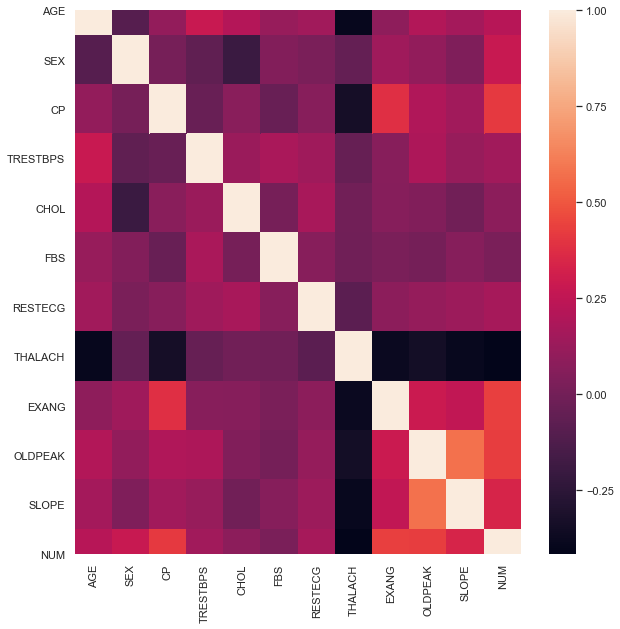

In [504]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the num value while some have positive.

 Next, I'll take a look at the histograms for each variable.

In [505]:
data.shape

(303, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002928EEBDE88>,
      dtype=object)

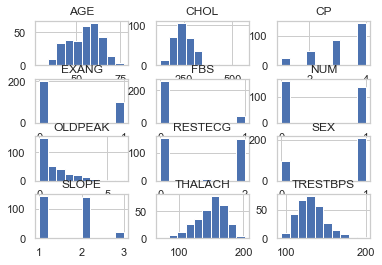

In [506]:
data.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

Text(0.5, 1.0, 'Age-Cholesterol Plot')

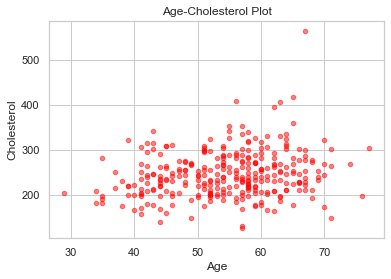

In [507]:
data.plot(kind = 'scatter',x = 'AGE', y = 'CHOL',alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

Scatter Plot between "AGE" and "CHOLESTEROL"

x = Age, y = Cholesterol

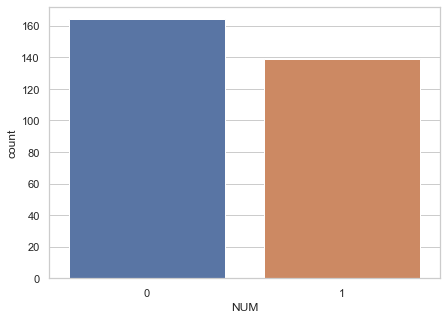

In [508]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=[7, 5])
sns.countplot(x = "NUM", data = data)

Printing the Number of 1's and 0's ::::
The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

In [509]:
x = data['NUM'].value_counts()
print(x)

0    164
1    139
Name: NUM, dtype: int64


Percentage of people having or not having Heart Disease

In [510]:
print("Percentage of patience without heart problems: "+str(round(x[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(x[1]*100/303,2)))

Percentage of patience without heart problems: 54.13
Percentage of patience with heart problems: 45.87


In [511]:
y = data['SEX'].value_counts()
print(y)

1    206
0     97
Name: SEX, dtype: int64


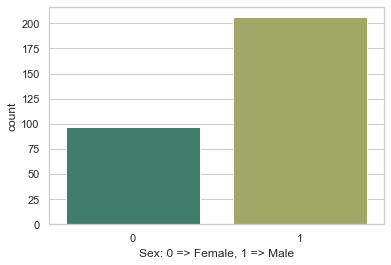

In [512]:
# Visualizing the distribution of Male and Female genders in the data
sns.countplot(x='SEX', data=data, palette='gist_earth')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

In [513]:
# We can utilize the crosstab method in the pandas library 
#to analyze how gender impacts a person's chance of getting a heart disease
gender_impact = pd.crosstab(data['SEX'], data['NUM'])
gender_impact

NUM,0,1
SEX,,
0,72,25
1,92,114


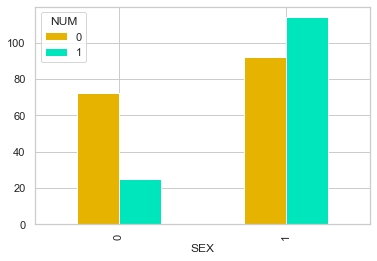

In [514]:
# We can go further to visualize these stats for a clearer view
gender_impact.plot(kind='bar', stacked=False, color=['#e6b400', '#00e6bc'])

- Number of females free from heart disease = 72
- Number of females diagnosed as having heart disease = 25

- Number of males free from heart disease = 92
- Number of males diagnosed as having heart disease = 114

In [515]:
data.describe()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,NUM
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


The features described in the above data set are:

1. Count: tells us the number of NoN-empty rows in a feature.

2. Mean: tells us the mean value of that feature.

3. Std: tells us the Standard Deviation Value of that feature.

4. Min: tells us the minimum value of that feature.

5. 25%, 50%, and 75%: are the percentile/quartile of each features.

6. Max: tells us the maximum value of that feature.

I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [516]:
data = pd.get_dummies(data, columns = ['SEX', 'CP', 'FBS', 'RESTECG', 'EXANG', 'SLOPE', 'CA', 'THAL'])

In [517]:
standardScaler = StandardScaler()
columns_to_scale = ['AGE', 'TRESTBPS', 'CHOL', 'THALACH', 'OLDPEAK']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

# IMPLEMENTING MODELS

In [518]:
y = data['NUM']
X = data.drop(['NUM'], axis = 1)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(len(XTrain))
len(XTest)

242


61

In [519]:
XTrain.head()

,AGE,TRESTBPS,CHOL,THALACH,OLDPEAK,SEX_0,SEX_1,CP_1,CP_2,CP_3,...,SLOPE_3,CA_0,CA_0,CA_1,CA_2,CA_3,THAL_3,THAL_3,THAL_6,THAL_7
74,-1.156832,-1.234430,-0.961341,1.199478,-0.896862,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
153,0.062176,1.611220,0.818452,-0.201743,-0.206705,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
64,-0.048643,-0.665300,-1.135451,-1.602965,0.310912,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
296,0.505451,1.838872,-1.367598,-2.610092,-0.034166,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
287,0.394632,-0.380735,-0.516393,-0.245532,-0.551783,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [520]:
yTrain.head()

74     1
153    1
64     1
296    1
287    0
Name: NUM, dtype: int64

Model 1: K Nearest Neighbour

In [521]:
from sklearn.metrics import classification_report
for i in range(8):
    knn = KNeighborsClassifier(n_neighbors=1+i)
    knn.fit(XTrain,yTrain)
    yPred = knn.predict(XTest)
    #print(yPred)
    cm = confusion_matrix(yTest,yPred)
    KnnAcc = accuracy_score(yTest,yPred)
    print("K Nearest Neighbors :")
    print("Accuracy for n =", str(i),KnnAcc)
#print("Accuracy = ", KnnAcc)
print(cm)
print(classification_report(yTest,yPred))
acc1 = accuracy_score(yTest,yPred)
print(acc1)

K Nearest Neighbors :
Accuracy for n = 0 0.7540983606557377
K Nearest Neighbors :
Accuracy for n = 1 0.7377049180327869
K Nearest Neighbors :
Accuracy for n = 2 0.7868852459016393
K Nearest Neighbors :
Accuracy for n = 3 0.7868852459016393
K Nearest Neighbors :
Accuracy for n = 4 0.7868852459016393
K Nearest Neighbors :
Accuracy for n = 5 0.8032786885245902
K Nearest Neighbors :
Accuracy for n = 6 0.7868852459016393
K Nearest Neighbors :
Accuracy for n = 7 0.819672131147541
[[32  3]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.86      0.69      0.77        26

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541


Model 2: Decision Tree


In [523]:
print("The score for Decision Tree Classifier is {} with maximum features.".format(dt_scores[0]))

The score for Decision Tree Classifier is 0.8524590163934426 with maximum features.


In [524]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt.fit(XTrain, yTrain)
    dt_scores.append(dt.score(XTest, yTest))
    print(i, dt_scores[i-1])
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


1 0.8524590163934426
2 0.7377049180327869
3 0.7213114754098361
4 0.6065573770491803
5 0.7377049180327869
6 0.7049180327868853
7 0.6885245901639344
8 0.7540983606557377
9 0.7704918032786885
10 0.7704918032786885
11 0.7540983606557377
12 0.819672131147541
13 0.7213114754098361
14 0.6885245901639344
15 0.7049180327868853
16 0.7377049180327869
17 0.6721311475409836
18 0.819672131147541
19 0.7213114754098361
20 0.7704918032786885
21 0.7704918032786885
22 0.7049180327868853
23 0.7213114754098361
24 0.7213114754098361
25 0.7540983606557377
26 0.7540983606557377
27 0.7213114754098361
28 0.7377049180327869
29 0.7868852459016393
30 0.7213114754098361
Optimal regularization parameter : 0.011242100350620874


In [525]:
print("The score for Decision Tree Classifier is {} with maximum features.".format(dt_scores[0]))

The score for Decision Tree Classifier is 0.8524590163934426 with maximum features.


Model 3: Logistic Regression

In [526]:
Lr_range = [0.001,0.01,0.1,1,10,100,1000]
for i in Lr_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(XTrain,yTrain)
    yPred = lr.predict(XTest)
    cm = confusion_matrix(yTest,yPred)
    LRAcc = accuracy_score(yTest,yPred)
#   print("Logistic Regression :")
    print("Accuracy Test = ",i,":", LRAcc)
    
print(classification_report(yTest,yPred))
acc1 = accuracy_score(yTest,yPred)
print(acc1)

#print(Lr_range)

Accuracy Test =  0.001 : 0.7377049180327869
Accuracy Test =  0.01 : 0.7377049180327869
Accuracy Test =  0.1 : 0.7868852459016393
Accuracy Test =  1 : 0.8032786885245902
Accuracy Test =  10 : 0.819672131147541
Accuracy Test =  100 : 0.819672131147541
Accuracy Test =  1000 : 0.819672131147541
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.80      0.77      0.78        26

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541


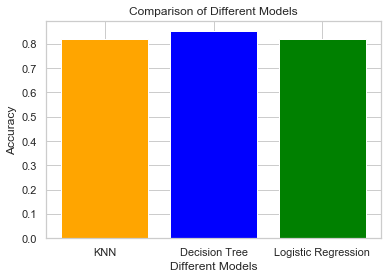

In [527]:
#Comparing performance of all models 
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [KnnAcc,dt_scores[0],LRAcc] 
  
# labels for bars 
tick_label = ['KNN', 'Decision Tree', 'Logistic Regression'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['orange', 'blue','green']) 
  
# naming the x-axis 
plt.ylabel('Accuracy') 
# naming the y-axis 
plt.xlabel('Different Models') 
# plot title 
plt.title('Comparison of Different Models') 
  
# function to show the plot 
plt.show() 